In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

# Read the dataset

bankrupt_data = pd.read_csv("Qualitative_Bankruptcy.data.txt",sep=",", names=["Industrial Risk", "Management Risk", "Financial Flexibility", "Credibility","Competitiveness","Operating Risk","Class"])  

In [5]:
bankrupt_data.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [6]:
bankrupt_data.info() # target variable is 'class' column that classifies bankrupt or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
bankrupt_data['Industrial Risk'] = lb_make.fit_transform(bankrupt_data['Industrial Risk'])
bankrupt_data['Management Risk'] = lb_make.fit_transform(bankrupt_data['Management Risk'])
bankrupt_data['Financial Flexibility'] = lb_make.fit_transform(bankrupt_data['Financial Flexibility'])
bankrupt_data['Credibility'] = lb_make.fit_transform(bankrupt_data['Credibility'])
bankrupt_data['Operating Risk'] = lb_make.fit_transform(bankrupt_data['Operating Risk'])
bankrupt_data['Competitiveness'] = lb_make.fit_transform(bankrupt_data['Competitiveness'])
bankrupt_data.head() 

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,NB
1,1,1,0,0,0,1,NB
2,0,0,0,0,0,0,NB
3,2,2,2,2,2,2,NB
4,1,1,2,2,2,1,NB


In [8]:
X = bankrupt_data[bankrupt_data.columns[0:6]]
y = bankrupt_data[bankrupt_data.columns[6:]]
X.head()
y.head()

,Class
0,NB
1,NB
2,NB
3,NB
4,NB


In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=3)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(Xtrain)
X_test = sc.transform(Xtest)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components =  None)
pca.fit(X_train)
variance = pca.explained_variance_ratio_

In [13]:
variancepca = PCA(n_components = 5 )
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.24838269, 0.20387385, 0.17257884, 0.13613256, 0.1304318 ,
       0.10860025])

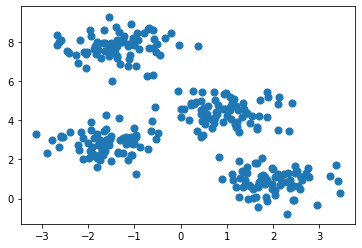

In [16]:
from sklearn.datasets.samples_generator import make_blobs
X_train, ytrain= make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X_train[:, 0], X_train[:, 1], s=50);

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

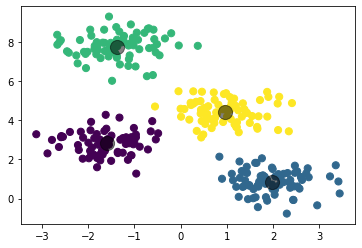

In [19]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

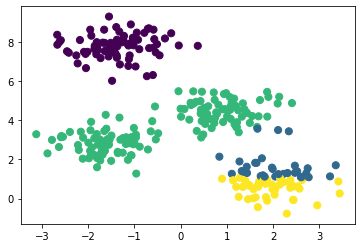

In [24]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X_train, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X_train[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X_train, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X_train[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X_train, 4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels,
            s=50, cmap='viridis');